In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
from itertools import product

sns.set()

from src.settings import *

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import normalized_mutual_info_score
from sklearn.decomposition import PCA

In [4]:
def read_embedding(method, name, dim):
    X = pd.read_csv(
        '{}/models/{}_{}_d{}.csv'.format(PATH_TO_DUMPS, method, name, dim),
        delim_whitespace=True, header=None,
        skiprows=1,
        index_col=0
    ).sort_index()
    X.index.name=None
    return X

In [111]:
methods = [
    'deepwalk', 
    'n2v_p1_q1', 
    'hist_loss',
]
names = ['Karate', 'Football', 'Stars', 'PolBooks', 'Email']
dims = [16]

Xs = {}
for method, name, dim in product(methods, names, dims):
    try:
        Xs[(method, name, dim)] = read_embedding(method, name, dim)
    except:
        print('Failed to load {}_{}_d{}.csv'.format(method, name, dim))

In [72]:
ys = {}
colors = {}
label_count = {
    'Karate': 2,
    'Football': 12,
    'Stars': 5,
    'PolBooks': 3,
    'Protein': 13,
    'Email': 42
}

ys['Karate'] = pd.read_csv(
    PATH_TO_KARATE + '/karate.mylabels',
    header=None,
    squeeze=True
)
colors['Karate'] = np.random.rand(2, 3)
ys['Football'] = pd.read_csv(
    PATH_TO_FOOTBALL + '/football_labels.txt',
    header=None,
    squeeze=True
)
colors['Football'] = np.random.rand(12, 3)
ys['Stars'] = pd.read_csv(
    PATH_TO_STARS + '/stars_labels.txt',
    header=None,
    squeeze=True
)
colors['Stars'] = np.random.rand(5, 3)
ys['PolBooks'] = pd.read_csv(
    PATH_TO_POLBOOKS + '/polbooks_labels.txt',
    header=None,
    squeeze=True
)
colors['PolBooks'] = np.random.rand(3, 3)
ys['Protein'] = pd.read_csv(
    PATH_TO_PROTEIN + '/protein_new_labels.txt',
    header=None,
    squeeze=True
)
colors['Protein'] = np.random.rand(13, 3)
ys['Email'] = pd.read_csv(
    PATH_TO_EMAIL + '/email-Eu-core_labels.txt',
    delimiter=' ',
    header=None
)[1]
colors['Email'] = np.random.rand(42, 3)

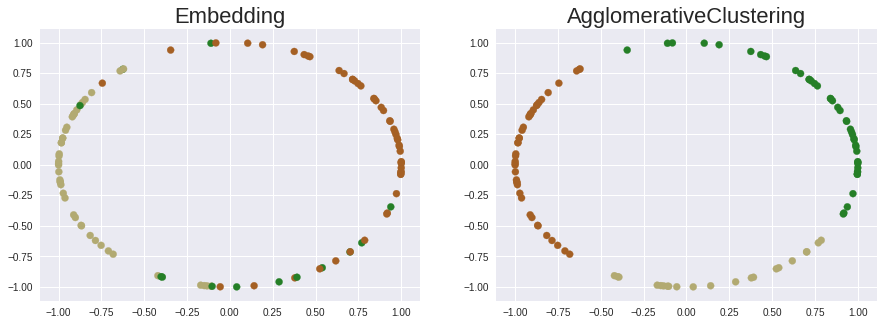

In [94]:
key = ('hist_loss', 'PolBooks', 2)
name, dim = key[1], key[2]
X_tmp = Xs[key].values
if dim > 2:
    X_tmp = PCA(n_components=2).fit_transform(X_tmp)
plt.subplots(figsize=(15, 5))
plt.subplot(121)
plt.title('Embedding', fontsize='22')
plt.scatter(X_tmp[:, 0], X_tmp[:, 1], c=[colors[name][x] for x in ys[name]])
clus = AgglomerativeClustering(n_clusters=label_count[name])
y_pred = clus.fit_predict(Xs[key])
plt.subplot(122)
plt.title('AgglomerativeClustering', fontsize='22')
plt.scatter(X_tmp[:, 0], X_tmp[:, 1], c=[colors[name][x] for x in y_pred])
plt.show()

In [112]:
scores = {}
for key in Xs:
    name = key[1]
    clus = AgglomerativeClustering(n_clusters=label_count[name])
    y_pred = clus.fit_predict(Xs[key])
    score = normalized_mutual_info_score(ys[name], y_pred)
    print(key, score)
    scores[key] = score

('deepwalk', 'Karate', 16) 0.336839460331
('deepwalk', 'Football', 16) 0.905760753896
('deepwalk', 'Stars', 16) 0.837545696831
('deepwalk', 'PolBooks', 16) 0.589084553561
('deepwalk', 'Email', 16) 0.630748076479
('n2v_p1_q1', 'Karate', 16) 0.268126871254
('n2v_p1_q1', 'Football', 16) 0.926055052082
('n2v_p1_q1', 'Stars', 16) 0.917859555176
('n2v_p1_q1', 'PolBooks', 16) 0.530425231219
('n2v_p1_q1', 'Email', 16) 0.685807065837
('hist_loss', 'Karate', 16) 0.575563550596
('hist_loss', 'Football', 16) 0.854307159519
('hist_loss', 'Stars', 16) 0.837545696831
('hist_loss', 'PolBooks', 16) 0.525829423214
('hist_loss', 'Email', 16) 0.632670874951


In [115]:
scores_d = [scores[key] for key in scores if key[0] == 'deepwalk']
scores_n = [scores[key] for key in scores if key[0] == 'n2v_p1_q1']
scores_h = [scores[key] for key in scores if key[0] == 'hist_loss']
scores_w = [1, 0.924, 0.836, 0.556]

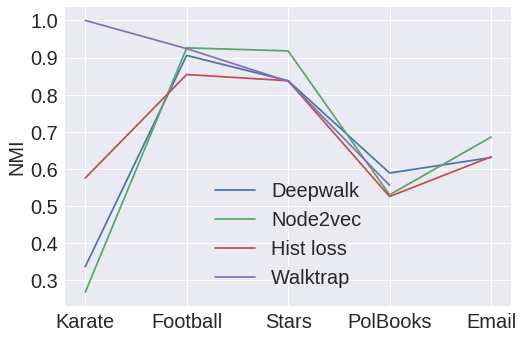

In [130]:
line_d, = plt.plot(scores_d, label='Deepwalk')
line_n, = plt.plot(scores_n, label='Node2vec')
line_h, = plt.plot(scores_h, label='Hist loss')
line_w, = plt.plot(scores_w, label='Walktrap')
plt.xticks(range(5), names, fontsize='20')
plt.legend(handles=[line_d, line_n, line_h, line_w], fontsize=20)
for item in line_d.axes.get_yticklabels(): item.set_fontsize('20')
plt.ylabel('NMI', fontsize=20)
plt.show()

In [50]:
plt.ylabel

<function matplotlib.pyplot.ylabel>